# TPM034A Machine Learning for socio-technical systems
## `Lab session 01: Discover, explore and visualise data`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

### `Instructions`

**Lab session aim to:**<br>
* Show and reinforce how models and ideas presented in class are put to practice.<br>
* Help you gather hands-on machine learning skills.<br>

**Lab sessions are:**<br>
* Learning environments where you work with Jupyter notebooks and where you can get support from TAs and fellow students.<br>
* Not graded and do not have to be submitted.
* A good preparation for the **assignments** (which are graded).
<br><br><br>

### `Use of AI tools`
AI tools, such as ChatGPT and Co-pilot, are great tools to assist with programming. Moreover, in your later careers you will work in a world where such tools are widely available. As such, we **encourage** you to use AI tools **effectively** (both in the lab sessions and assignments). However, be careful not to overestimate the capacity of AI tools! AI tools cannot replace you: you still have to conceptualise the problem, dissect it and structure it, to conduct proper analysis and modelling. We recommend being especially **reticent** with using AI tools for the more conceptual and reflective oriented questions.

### `Workspace set-up`

**Option 1: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [ ]:
#!pip install -r requirements.txt

**Option 2: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [1]:
!git clone https://github.com/TPM034A/Q2_2023
!pip install -r Q2_2023/requirements_colab.txt
!mv "/content/Q2_2023/Lab_sessions/lab_session_01/data" /content/data

Cloning into 'Q2_2023'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 124 (delta 20), reused 16 (delta 7), pack-reused 81
Receiving objects: 100% (124/124), 42.34 MiB | 20.88 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Updating files: 100% (35/35), done.


### `Application: liveability in the Netherlands` <br>
In this lab session, we will explore how liveable the Netherlands is. Liveability is high on the policy agenda. Many policies directly or indirectly aim to improve liveability, such as e.g. lowering traffic speed, curbing noise levels, maintaining public gardens and spaces, etc. But liveability is hard to study due to its elusive and complex subjective nature. In this lab session, we will discover how liveability is spatially distributed, and what factors associate positively or negatively with liveability.<br>

**Learning objectives**. After completing the following exercises you will be able to: <br>
1. Construct a data set from multiple sources using `pandas`<br>
2. Discover and visualise data, using `seaborn` and `geopandas`<br>
3. Explore associations using scatter plots and correlation heat maps<br>
4. Conduct linear regression, using `sk-learn`<br>

In [2]:
# Import required Python packages and modules
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


# Import selected functions and classes from Python packages
from os import getcwd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### 1. Constructing a data set from multiple data sources<br>
To construct a data set from multiple data sources, we will:<br>
- A. **Load** the 3 data sets:<br>
    - A.1. Liveability data<br>
    - A.2. Population statistics data<br>
    - A.3. Topological data<br>
- B. **Clean** the data<br>
- C. **Combine** the data<br>

##### A. Loading data <br>

We first load our primary data source on **liveability**. There are three liveability data sets, with varying **spatial levels**: <br>
* `Gemeente`  Municipality
* `Wijk`      Neighbourhood
* `Buurt`     Local neighbourhood

In [3]:
# Get the current working directory
working_folder = getcwd()
data_folder = Path(f'data')
print(data_folder)

data


In [4]:
# Load liveability data, using pandas
gemeente_liv_data = pd.read_csv(data_folder/'gemeente_liveability.csv')
wijk_liv_data = pd.read_csv(data_folder/'wijk_liveability.csv')
buurt_liv_data = pd.read_csv(data_folder/'buurt_liveability.csv')
print(list(gemeente_liv_data.keys()))

['gm_code', 'versie', 'jaar', 'gm_naam', 'lbm', 'afw', 'fys', 'onv', 'soc', 'vrz', 'won']


*Description of variables*<br>
`gm_code`&nbsp;&nbsp;&nbsp;Unique code for gemeente <br>
`versie `&nbsp;&nbsp;&nbsp;Version of the 'Leefbaarometer model' used <br>
`jaar   `&nbsp;&nbsp;&nbsp;&nbsp;&emsp;Year <br>
`gm_naam`&emsp;Name of gemeente <br>

*Liveability indicators:* <br>
`lbm`   &emsp;**lbm** is the **key variable of interest** in this lab session. It is composed of the variables below: <br>
`afw`   &emsp;Deviation from previous model <br>
`fys`   &emsp;Physical environment<br>
`onv`   &emsp;Nuisance and insecurity<br>
`soc`   &emsp;Social cohesion<br>
`vrz`   &emsp;Amenities<br>
`won`   &emsp;Housing stock<br>

We load the second source of data. These data contains population statistics.

In [5]:
# Load files on population statistics
gemeente_pop_data = pd.read_csv(data_folder/'gemeente_2020_pop.csv', sep=';')
wijk_pop_data = pd.read_csv(data_folder/'wijk_2020_pop.csv', sep=';')
buurt_pop_data = pd.read_csv(data_folder/'buurt_2020_pop.csv', sep=';')
gemeente_pop_data.keys()

Index(['GM_CODE', 'GM_NAAM', 'H2O', 'OAD', 'STED', 'BEV_DICHTH', 'AANT_INW',
       'AANT_MAN', 'AANT_VROUW', 'P_00_14_JR',
       ...
       'AF_PODIUM', 'AV5_PODIUM', 'AV10PODIUM', 'AV20PODIUM', 'AF_MUSEUM',
       'AV5_MUSEUM', 'AV10MUSEUM', 'AV20MUSEUM', 'JRSTATCODE', 'JAAR'],
      dtype='object', length=178)

Finally, we load data on the topology of gemeenten, wijken and buurten. To do this, load the **shape files** using geopandas.

In [6]:
# Load shape files
gemeente_shape = gpd.read_file(data_folder/'gemeente/gemeente 2020.shp')
wijk_shape = gpd.read_file(data_folder/'wijk/wijk 2020.shp')
buurt_shape = gpd.read_file(data_folder/'buurt/buurt 2020.shp')
buurt_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13808 entries, 0 to 13807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   bu_code   13808 non-null  object  
 1   bu_naam   13808 non-null  object  
 2   gm_naam   13808 non-null  object  
 3   geometry  13808 non-null  geometry
dtypes: geometry(1), object(3)
memory usage: 431.6+ KB


##### B. Cleaning data
First, we clean the liveability data sets. <br>
More specifically, we: <br>
* Extract only those data points for which we have a liveability score.
* Extract only those data points that are created by `Leefbaarometer 3.0` and for year `2020`.

In [7]:
# Remove rows where lbm is NaN
gemeente_liv_data.dropna(subset = ['lbm'], inplace = True)
# Extract subsets: only year 2020 and Leefbaarometer 3.0 data
gemeente_liv_data = gemeente_liv_data.loc[(gemeente_liv_data.versie ==  'Leefbaarometer 3.0') & (gemeente_liv_data.jaar == 2020)]
wijk_liv_data.dropna(subset = ['lbm'], inplace = True)
wijk_liv_data = wijk_liv_data.loc[(wijk_liv_data.versie ==  'Leefbaarometer 3.0') & (wijk_liv_data.jaar == 2020)]
buurt_liv_data.dropna(subset = ['lbm'], inplace = True)
buurt_liv_data = buurt_liv_data.loc[(buurt_liv_data.versie ==  'Leefbaarometer 3.0') & (buurt_liv_data.jaar == 2020)]

Next, we clean the population data sets.<br>
More specifically, we: <br>
* Remove useless data points (i.e. water areas, opposed to land areas)
* Drop data points where the percentage of owner occupied homes and rented homes equals 0 (for later analyses)

In [8]:
def clean_pop_data(pop_data):

    # Extract subsets: only data where is land
    pop_data  = pop_data.loc[pop_data.H2O == 'NEE']

    # Remove rows where P_KOOPWON == 0 or P_HUURWON == 0
    pop_data = pop_data.loc[(pop_data.P_KOOPWON>0) | (pop_data.P_HUURWON>0)]

    return pop_data

gemeente_pop_data = clean_pop_data(gemeente_pop_data)
wijk_pop_data = clean_pop_data(wijk_pop_data)
buurt_pop_data = clean_pop_data(buurt_pop_data)

##### C. Combining data
Now, we pull together the population and liveability data sets, using pandas' `merge` function. We use `GM_CODE`, `WK_CODE` and `BU_CODE` as key indices to merge on.<br>
For the `merge` operation, the keys must be the same. Therefore, we first capitalise the keys of the shape files.<br>

In [9]:
# Capitalise column name of variables to merge on (to be the same across data sets)
gemeente_liv_data.rename(columns={"gm_code": "GM_CODE"}, inplace=True)
wijk_liv_data.rename(columns={"wk_code": "WK_CODE"}, inplace=True)
buurt_liv_data.rename(columns={"bu_code": "BU_CODE"}, inplace=True)

# Merge DataFrames
gemeente_data = gemeente_pop_data.merge(gemeente_liv_data, on ="GM_CODE", how = "inner")
wijk_data = wijk_pop_data.merge(wijk_liv_data, on="WK_CODE", how = "inner")
buurt_data = buurt_pop_data.merge(buurt_liv_data, on="BU_CODE", how = "inner")

<ipython-input-9-87f800942354>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buurt_liv_data.rename(columns={"bu_code": "BU_CODE"}, inplace=True)


Next, we add the topological (shape) data, using `merge`. Again, we use `GM_CODE`, `WK_CODE`, and `BU_CODE` as indices.<br>
For the `merge` operation, the keys must be the same. Therefore, we first capitalise the keys of the shape files.<br>

In [10]:
# Capitalise column name of key variables
gemeente_shape = gemeente_shape.rename(columns={"gm_code": "GM_CODE"}).drop(columns = 'gm_naam')
wijk_shape = wijk_shape.rename(columns={"wk_code": "WK_CODE"}).drop(columns = 'wk_naam')
buurt_shape = buurt_shape.rename(columns={"bu_code": "BU_CODE"}).drop(columns = 'bu_naam')

# Merge the GeoDataFrame and the DataFrame
gemeente_df = gemeente_shape.merge(gemeente_data, on="GM_CODE")
wijk_df = wijk_shape.merge(wijk_data, on="WK_CODE")
buurt_df = buurt_shape.merge(buurt_data, on="BU_CODE")

### <span style="color:skyblue">Exercise 1: Exploring the data</span>

`A` Load data file `Gemeenten alfabetisch 2020.excel` into a pandas DataFrame, using `pd.read_excel()`.<br>

`B` Explore the content, e.g. using `.describe()`, `.head()`, and `.info()`
<br>

`C` Add the provincies of the Netherlands to the `gemeente_df` DataFrame, the `wijk_df` DataFrame. and the `buurt_df` DataFrame.<br>
To do so, you need to merge two data set, based on the `GM_CODE`

In [11]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
provincie_data = pd.read_excel(data_folder/'Gemeenten alfabetisch 2020.xlsx')

In [12]:
# B
provincie_data.describe()
provincie_data.head()

,Gemeentecode,GM_CODE,Gemeentenaam,Provinciecode,ProvinciecodePV,Provincienaam
0,1680,GM1680,Aa en Hunze,22,PV22,Drenthe
1,358,GM0358,Aalsmeer,27,PV27,Noord-Holland
2,197,GM0197,Aalten,25,PV25,Gelderland
3,59,GM0059,Achtkarspelen,21,PV21,Friesland
4,482,GM0482,Alblasserdam,28,PV28,Zuid-Holland


In [13]:
# C
gemeente_df = gemeente_df.merge(provincie_data,on='GM_CODE')
wijk_df = wijk_df.merge(provincie_data,on='GM_CODE')
buurt_df = buurt_df.merge(provincie_data,on='GM_CODE')
buurt_df.Provincienaam.head()

0    Groningen
1    Groningen
2    Groningen
3    Groningen
4    Groningen
Name: Provincienaam, dtype: object

#### 2. Discovering and visualising the data
After having constructed our data set, it is time to explore the data more in depth. To do so, we use pandas `describe`, `head` and `info` functions. Additionally, to visualise the data, we create histograms (empirical cumulative density function plots). This is done using **seaborn** package.

Let's first look at the key variable of interest: `lbm` (liveability), and visualise its ditribution using a histogram and a cumulative density function plot.

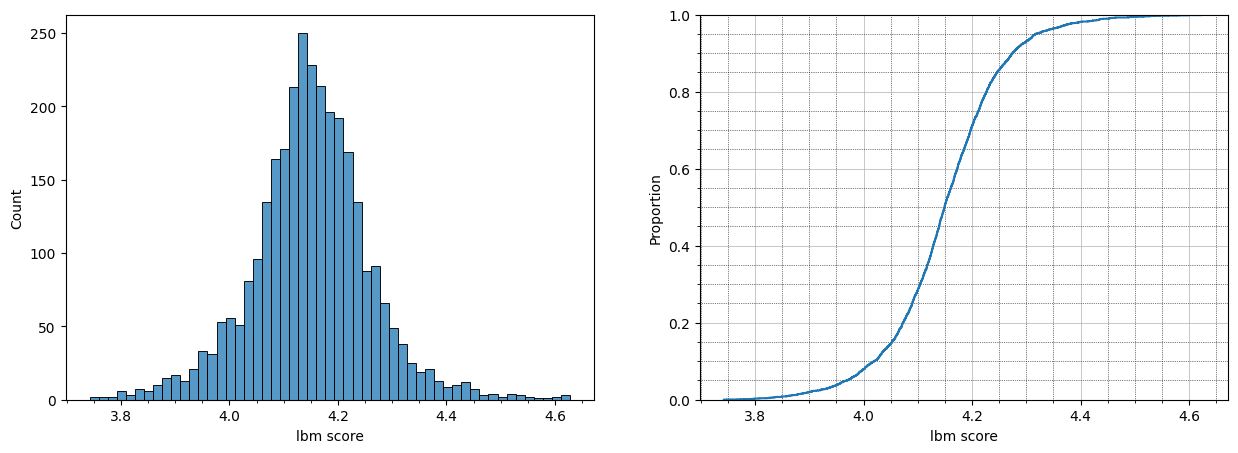

In [14]:
# Create histogram and empirical CDF for variable(s) of interest
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
sns.histplot(ax = axes[0],x = wijk_df.lbm)
ecdf_data = sns.ecdfplot(ax = axes[1],x = wijk_df.lbm)
axes[0].set_xlabel("lbm score")
axes[1].set_xlabel("lbm score")
axes[1].grid(True,linewidth = 0.5)
axes[1].minorticks_on()
axes[1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')


**interpretation of results**
* Liveability of wijken is approximately normally distributed (no skew / higher moments)
* The mean and median liveability of wijken is ~4.15
* The domain of liveability is ~ [3.7-4.6]

### <span style="color:skyblue">Exercise 2: Distribution of social cohesion</span>
Besides liveability, in the liveability data there is also a variable on social cohesion `soc`.<br>
`A` Conduct several descriptive analyses, such as histograms, boxplots, etc, on the variable `soc`<br>
`B` Interpret your results

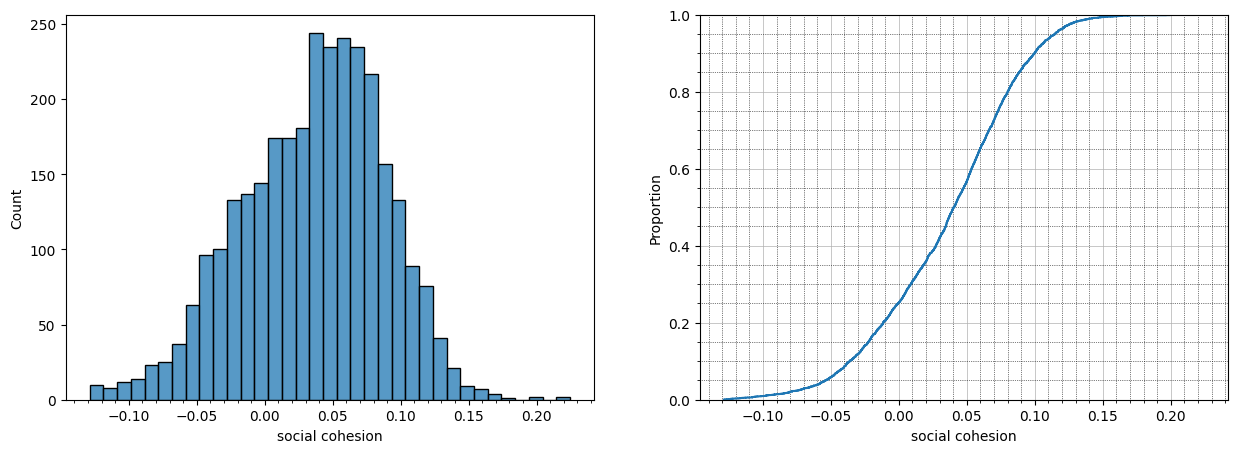

In [15]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
sns.histplot(ax = axes[0],x = wijk_df.soc)
ecdf_data = sns.ecdfplot(ax = axes[1],x = wijk_df.soc)
axes[0].set_xlabel("social cohesion")
axes[1].set_xlabel("social cohesion")
axes[1].grid(True,linewidth = 0.5)
axes[1].minorticks_on()
axes[1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [16]:
# B
# There seems to be a large spread. Furthermore, we see that this variable is 0 centrered

An important step when discovering data is to evaluate their **face validity**. To do so, let's see whether to top-rated wijken seems to make sense.

In [17]:
# List top-5 best wijken, based on liveability
wijk_df.nlargest(5,'lbm').head(5)

,WK_CODE,gm_naam,geometry,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,H2O,OAD,STED,...,fys,onv,soc,vrz,won,Gemeentecode,Gemeentenaam,Provinciecode,ProvinciecodePV,Provincienaam
808,WK036302,Amsterdam,"POLYGON ((120668.992 487465.601, 120670.593 48...",Grachtengordel-West,GM0363,Amsterdam,1,NEE,10678,1,...,0.003124,-0.057002,-0.057766,0.612074,0.025129,363,Amsterdam,27,PV27,Noord-Holland
828,WK036322,Amsterdam,"POLYGON ((120016.875 486171.765, 120130.694 48...",Vondelbuurt,GM0363,Amsterdam,1,NEE,9724,1,...,-0.016662,-0.032454,-0.051559,0.594127,0.027747,363,Amsterdam,27,PV27,Noord-Holland
809,WK036303,Amsterdam,"POLYGON ((120757.415 486467.356, 120750.405 48...",Grachtengordel-Zuid,GM0363,Amsterdam,1,NEE,9272,1,...,0.022858,-0.097292,-0.040515,0.607788,0.027745,363,Amsterdam,27,PV27,Noord-Holland
119,WK009600,Vlieland,"MULTIPOLYGON (((138217.745 590528.676, 138315....",Wijk 00,GM0096,Vlieland,1,NEE,208,5,...,0.376499,0.122632,0.033750,-0.043568,0.008214,96,Vlieland,21,PV21,Friesland
1291,WK051810,'s-Gravenhage,"POLYGON ((79575.760 456937.040, 79578.400 4569...",Wijk 10 Zorgvliet,GM0518,'s-Gravenhage,1,NEE,4163,1,...,0.087135,0.072620,0.014838,0.233574,0.087249,518,'s-Gravenhage,28,PV28,Zuid-Holland


### <span style="color:skyblue">Exercise 3: Face validity of worst neighbourhoods (wijken)</span>
The best scoring neighbourhoods seem to make sense. Let's also look at the worst scoring neighbourhoods.<br>
`A` List the 10 neighourhoods (wijken) which score lowest on `lbm`

In [18]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
wijk_df.nsmallest(5,'lbm').head(10)

,WK_CODE,gm_naam,geometry,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,H2O,OAD,STED,...,fys,onv,soc,vrz,won,Gemeentecode,Gemeentenaam,Provinciecode,ProvinciecodePV,Provincienaam
69,WK008050,Leeuwarden,"POLYGON ((183883.611 580216.812, 183875.967 58...",Heechterp & Schieringen,GM0080,Leeuwarden,1,NEE,2395,2,...,0.032619,-0.241097,-0.078192,-0.009183,-0.064056,80,Leeuwarden,21,PV21,Friesland
1311,WK051830,'s-Gravenhage,"POLYGON ((79514.870 453802.130, 79503.540 4538...",Wijk 30 Transvaalkwartier,GM0518,'s-Gravenhage,1,NEE,7941,1,...,-0.041024,-0.284179,-0.117140,0.234298,-0.146054,518,'s-Gravenhage,28,PV28,Zuid-Holland
735,WK034403,Utrecht,"POLYGON ((134335.839 458999.112, 134250.809 45...",Wijk 03 Overvecht,GM0344,Utrecht,1,NEE,3276,1,...,-0.030176,-0.246043,-0.087676,0.103762,-0.074552,344,Utrecht,26,PV26,Utrecht
1160,WK047912,Zaanstad,"POLYGON ((118678.807 495146.424, 118695.683 49...",Wijk 12 Poelenburg,GM0479,Zaanstad,1,NEE,2176,2,...,-0.008356,-0.185486,-0.073643,0.061053,-0.121695,479,Zaanstad,27,PV27,Noord-Holland
1916,WK085539,Tilburg,"POLYGON ((130930.719 399235.829, 131258.299 39...",Wandelbos Noord,GM0855,Tilburg,1,NEE,2018,2,...,-0.019296,-0.158182,-0.055536,-0.023011,-0.065888,855,Tilburg,30,PV30,Noord-Brabant


As we have added topological data to the dataframe, we can visualise the data in space. <br>
To further discover the data, let's first look at the municipality level. We color municipalities based on the average liveability score.

In [19]:
wijk_df.head()

,WK_CODE,gm_naam,geometry,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,H2O,OAD,STED,...,fys,onv,soc,vrz,won,Gemeentecode,Gemeentenaam,Provinciecode,ProvinciecodePV,Provincienaam
0,WK000300,Appingedam,"POLYGON ((249539.950 593217.579, 249543.450 59...",Wijk 00,GM0003,Appingedam,1,NEE,1066,3,...,0.017464,0.013291,0.016685,-0.101019,0.017558,3,Appingedam,20,PV20,Groningen
1,WK001001,Delfzijl,"POLYGON ((257784.664 595407.874, 257803.936 59...",Centrum,GM0010,Delfzijl,1,NEE,971,4,...,0.090506,-0.161272,-0.014273,-0.041617,-0.042367,10,Delfzijl,20,PV20,Groningen
2,WK001002,Delfzijl,"POLYGON ((256243.260 595010.649, 256298.162 59...",West,GM0010,Delfzijl,1,NEE,1211,3,...,0.019754,0.050490,0.028358,-0.107247,-0.008546,10,Delfzijl,20,PV20,Groningen
3,WK001003,Delfzijl,"POLYGON ((256902.711 593729.918, 256895.633 59...",Farmsum,GM0010,Delfzijl,1,NEE,684,4,...,0.017745,0.012907,0.026903,-0.118626,0.020759,10,Delfzijl,20,PV20,Groningen
4,WK001004,Delfzijl,"POLYGON ((254689.076 593574.272, 254689.380 59...",Tuikwerd,GM0010,Delfzijl,1,NEE,555,4,...,0.042796,-0.067327,0.003819,-0.178033,-0.009604,10,Delfzijl,20,PV20,Groningen


In [20]:
gemeente_df.head()

,GM_CODE,geometry,GM_NAAM,H2O,OAD,STED,BEV_DICHTH,AANT_INW,AANT_MAN,AANT_VROUW,...,fys,onv,soc,vrz,won,Gemeentecode,Gemeentenaam,Provinciecode,ProvinciecodePV,Provincienaam
0,GM0003,"POLYGON ((249539.950 593217.579, 249543.450 59...",Appingedam,NEE,1066,3,490,11642,5671,5971,...,0.017464,0.013291,0.016685,-0.101019,0.017558,3,Appingedam,20,PV20,Groningen
1,GM0010,"MULTIPOLYGON (((267829.905 587996.480, 267824....",Delfzijl,NEE,678,4,185,24678,12429,12249,...,0.036499,-0.000034,0.025425,-0.154673,0.021294,10,Delfzijl,20,PV20,Groningen
2,GM0014,"POLYGON ((227979.943 584879.819, 227981.153 58...",Groningen,NEE,3267,1,1255,232874,115838,117036,...,0.021706,-0.015533,-0.022861,0.091717,0.000356,14,Groningen,20,PV20,Groningen
3,GM0024,"POLYGON ((244952.159 601043.418, 244954.500 60...",Loppersum,NEE,214,5,86,9537,4830,4707,...,0.012457,0.089088,0.069216,-0.204871,0.059806,24,Loppersum,20,PV20,Groningen
4,GM0034,"MULTIPOLYGON (((142993.687 482642.725, 142993....",Almere,NEE,1613,2,1640,211893,105130,106763,...,0.011499,-0.052280,-0.009295,0.003025,-0.032666,34,Almere,24,PV24,Flevoland


In [21]:
# Plot the liveability in the Netherlands at the wijk-level
fig, ax = plt.subplots(figsize=(60,60))
wijk_df.plot(ax=ax, column = 'lbm', legend = True)
gemeente_df.plot(ax=ax, color  = 'none', edgecolor='black')
_=gemeente_df.apply(lambda x: ax.annotate(text=x['GM_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# gemeente_df.apply(lambda x: '' if x['AANT_INW']<50000 else ax.annotate(text=x['GM_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

Output hidden; open in https://colab.research.google.com to view.

**Interpretation of results**
* Wijken located near the coast (including the islands) score above average.
* Larger cities (e.g. AMS, RT, Tilburg, Utrecht, The Hague) seem to have multiple very poor performing wijken
* In some municipalities, data are patchy (missing)

Next, we do the same, but at the lowest spatial level (buurten) focusing on the municipality of Delft.

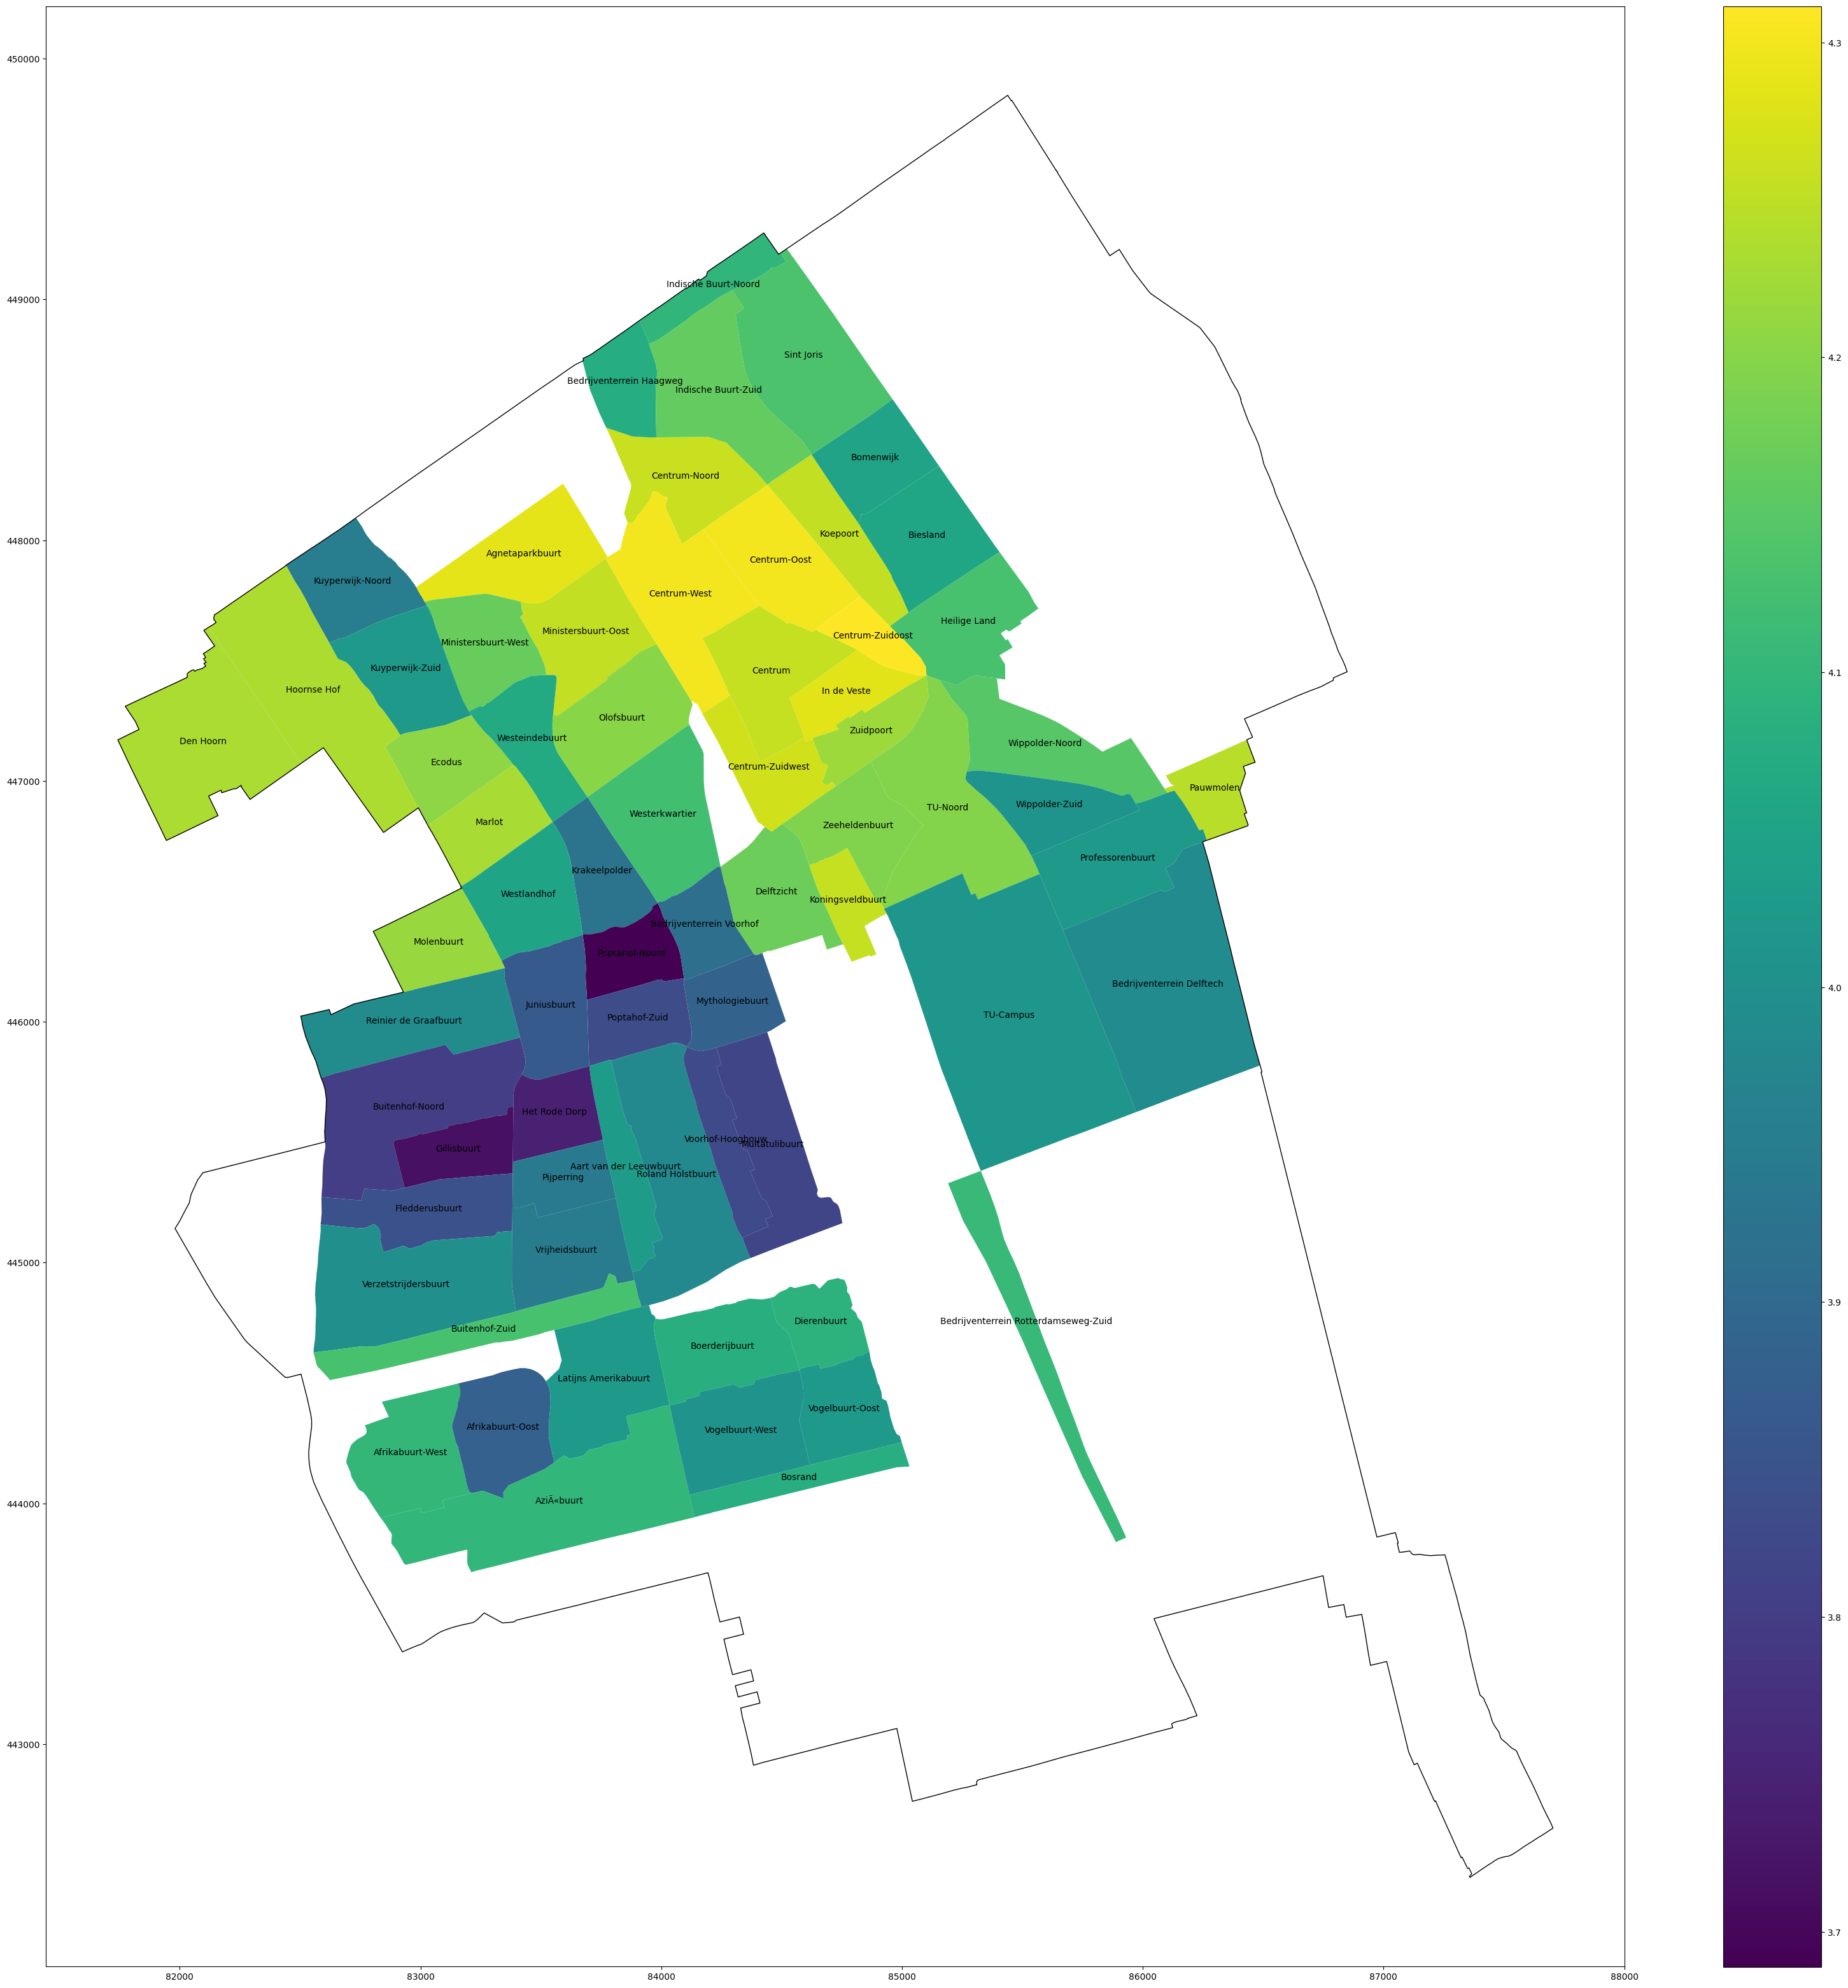

In [22]:
# Plot the liveability in Delft at the buurt-level
fig, ax = plt.subplots(figsize=(40,40))
buurt_df.loc[buurt_df.GM_NAAM == 'Delft'].plot(ax=ax, column = 'lbm', legend = True)
gemeente_df.loc[gemeente_df.GM_NAAM == 'Delft'].plot(ax=ax, color  = 'none', edgecolor='black')
buurt_df.loc[buurt_df.GM_NAAM == 'Delft'].apply(lambda x: ax.annotate(text=x['BU_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()

### <span style="color:skyblue">Exercise 4: Visualise local neighbourhoods in Zuid-Holland</span>
`A` Plot the liveability score in Zuid-Holland at the buurt level

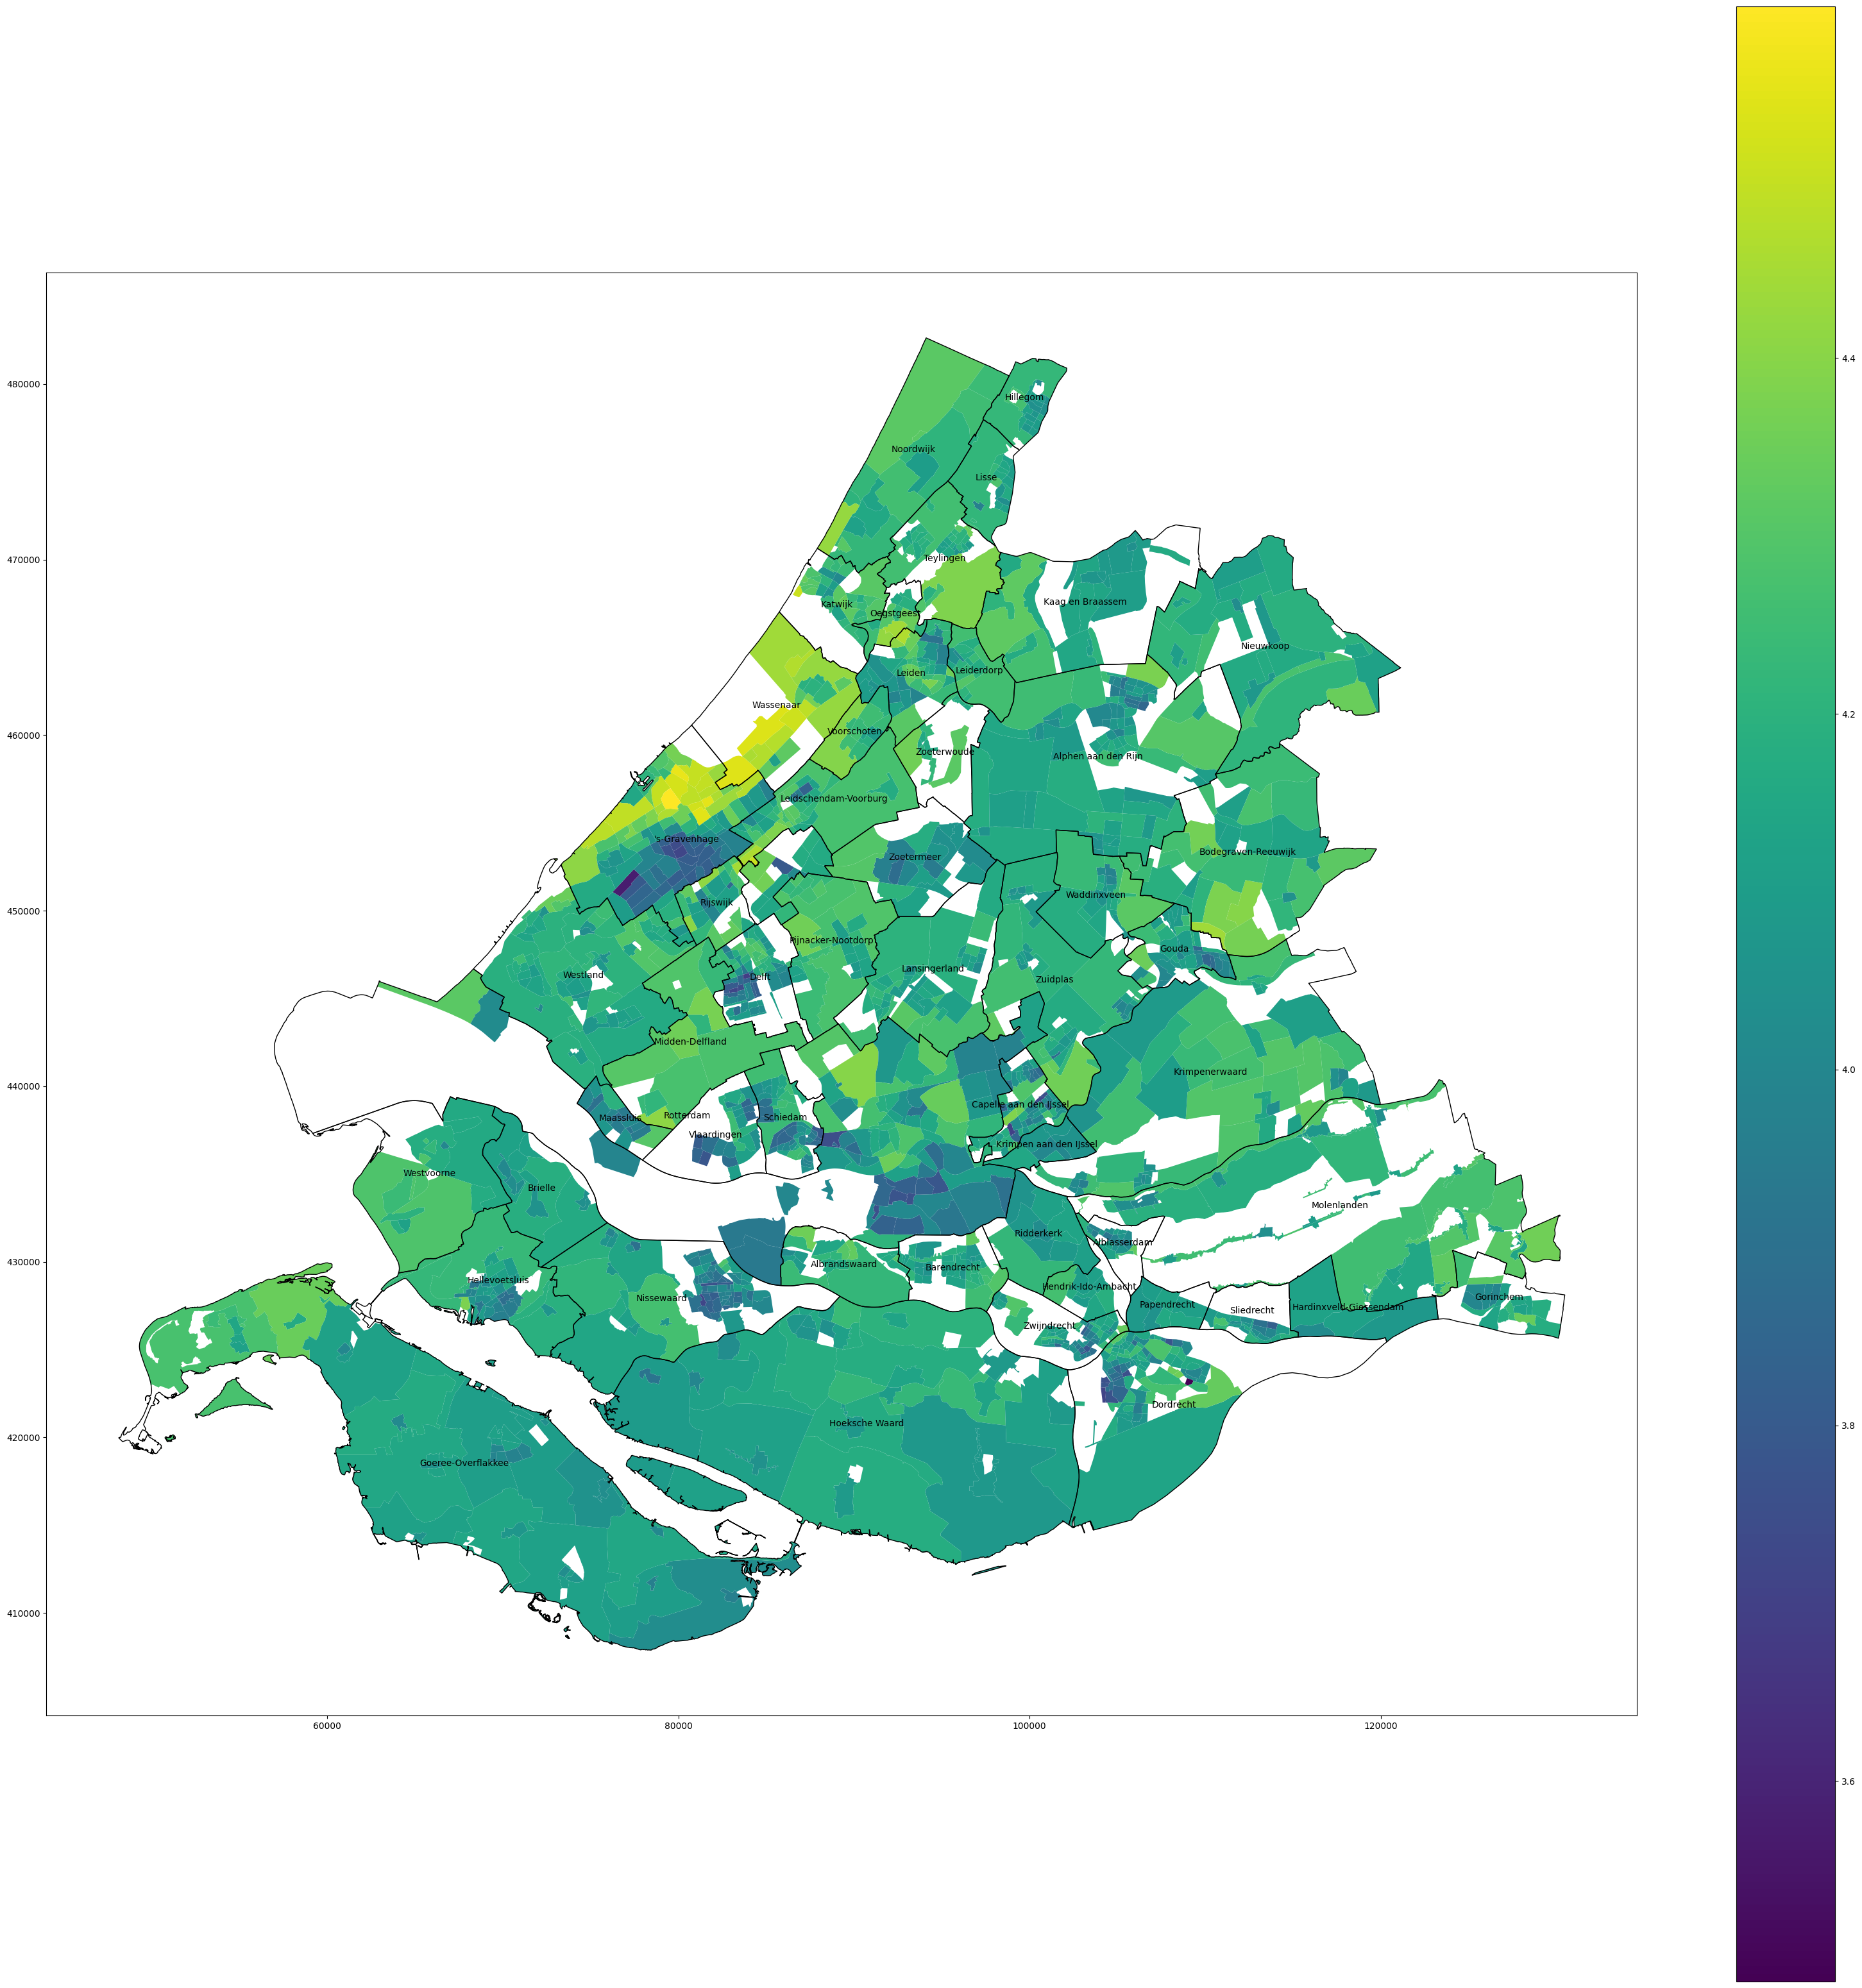

In [23]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A

fig, ax = plt.subplots(figsize=(40,40))
buurt_df.loc[buurt_df.Provincienaam == 'Zuid-Holland'].plot(ax=ax, column = 'lbm', legend = True)
gemeente_df.loc[gemeente_df.Provincienaam == 'Zuid-Holland'].plot(ax=ax, color  = 'none', edgecolor='black')
gemeente_df.loc[gemeente_df.Provincienaam == 'Zuid-Holland'].apply(lambda x: ax.annotate(text=x['GM_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()

#### 3. Exploring associations
To explore associations, we use correlation heat maps, scatter plots and boxplots <br>

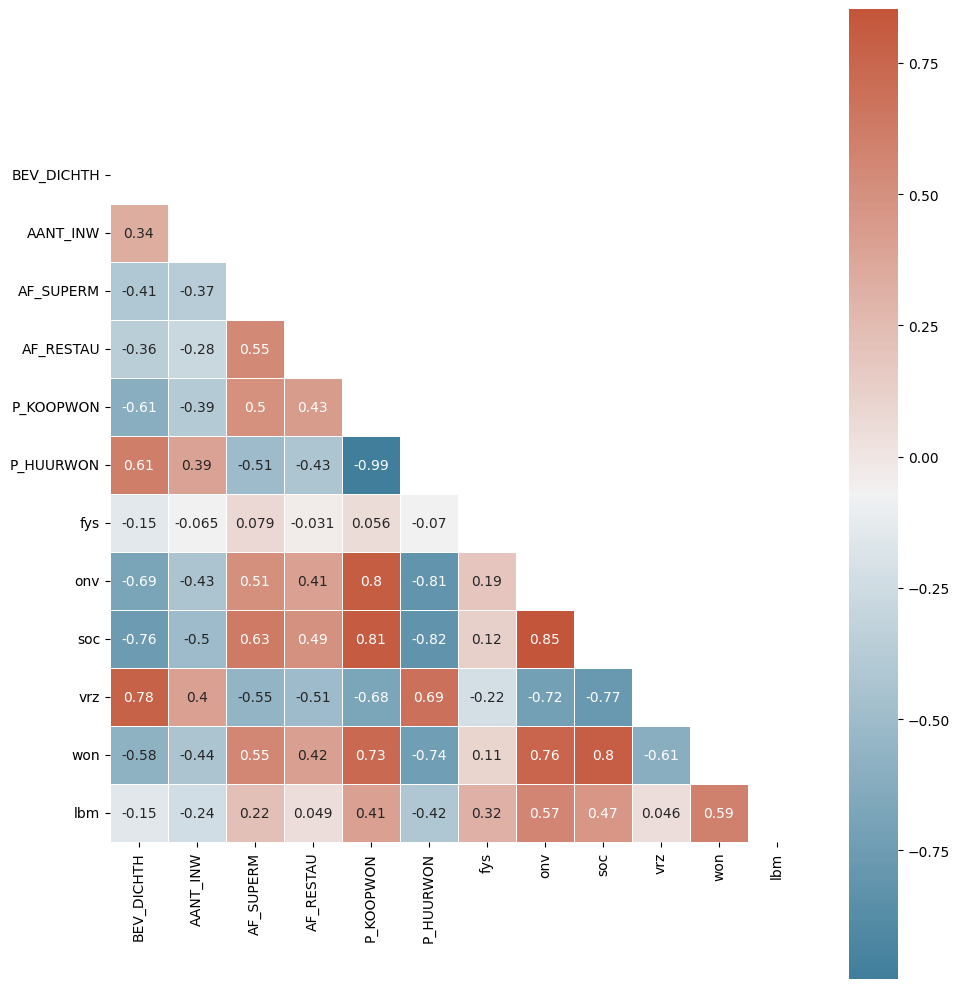

In [24]:
# heatmap of correlations
# Create plot
fig, axes = plt.subplots(figsize=(10, 10))
fig.set_tight_layout(True)

# Compute correlation matrix
corr = wijk_df[['BEV_DICHTH','AANT_INW','AF_SUPERM','AF_RESTAU','P_KOOPWON','P_HUURWON', 'fys', 'onv', 'soc', 'vrz', 'won','lbm']].corr()

# Create upper triangular matrix to mask the upper triangular part of the heatmap
corr_mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap (because it looks better)
corr_cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask = corr_mask, cmap=corr_cmap, annot=True,square = True, linewidths=.5, ax = axes)
plt.show()

**Interpretation of the results** <br>
1. Pearson corr coefficients range from [-0.99,0.86]
2. *P_HUURWON* and *P_KOOPWON* correlate (almost) 1 to 1 (which makes sense).<br>

Looking at the bottom row for lbm, we see that:<br>

3. *BEV_DICHTH*, *AANT_INW*, *P_HUURWON* correlate negatively with liveability
4. *AF_SUPERM*, *AF_RESTAU*, *P_KOOPWON*, *fys*, *onv*, *soc*, *vrz*, *won* correlate positively with liveability
5. lbm correlates strongest with *onv* (nuisance and insecurity), *soc* (social cohesion), *won* (housing stock)


Text(0.5, 0, 'Percentage rental homes [%]')

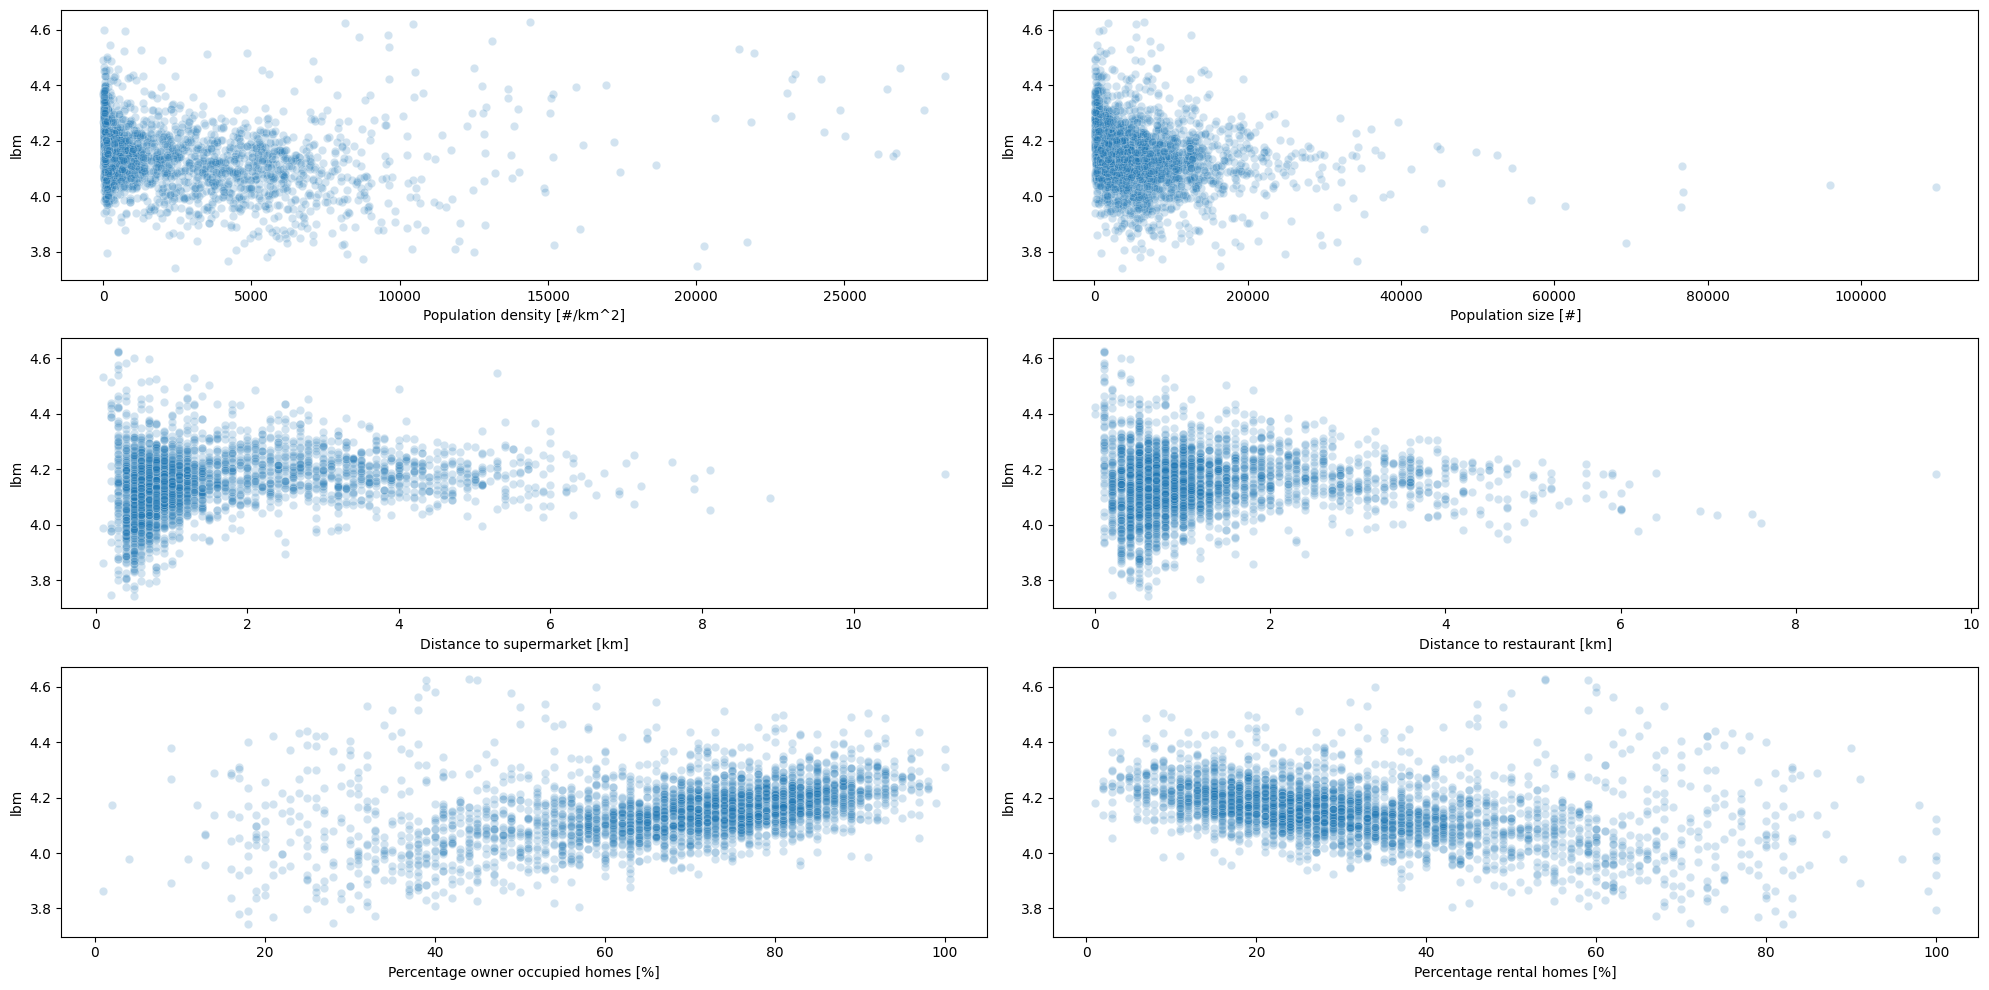

In [25]:
# Further explore linear associations using scatter plots
# plot
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.set_tight_layout(True)
sns.scatterplot(ax = axes[0,0],x = wijk_df.BEV_DICHTH, y = wijk_df.lbm, alpha = 0.2)
sns.scatterplot(ax = axes[0,1],x = wijk_df.AANT_INW, y = wijk_df.lbm, alpha = 0.2)
sns.scatterplot(ax = axes[1,0],x = wijk_df.AF_SUPERM, y = wijk_df.lbm, alpha = 0.2)
sns.scatterplot(ax = axes[1,1],x = wijk_df.AF_RESTAU, y = wijk_df.lbm, alpha = 0.2)
sns.scatterplot(ax = axes[2,0],x = wijk_df.P_KOOPWON[wijk_df.P_KOOPWON>0], y = wijk_df.lbm[wijk_df.P_KOOPWON>0], alpha = 0.2)
sns.scatterplot(ax = axes[2,1],x = wijk_df.P_HUURWON[wijk_df.P_HUURWON>0], y = wijk_df.lbm[wijk_df.P_HUURWON>0], alpha = 0.2)


axes[0,0].set_xlabel('Population density [#/km^2]')
axes[0,1].set_xlabel('Population size [#]')
axes[1,0].set_xlabel('Distance to supermarket [km]')
axes[1,1].set_xlabel('Distance to restaurant [km]')
axes[2,0].set_xlabel('Percentage owner occupied homes [%]')
axes[2,1].set_xlabel('Percentage rental homes [%]')

**Interpretation of the results** <br>
* The scatter plots show the bivariate relations with liveability is strongest for *P_KOOPWON* and *P_HUURWON*.
* For *BEV_DICHTH*, *AANT_INW*, *AF_RESTAU* and *P_KOOPWON* the data seems skewed, condensed around x = 0.

**Boxplot analysis** <br>

When one of the features is categorical a **boxplot** can be insightful. <br>
Boxplots are informative as they also reveal insights on the locality, spread and skewness of numerical data through their quartiles, see https://en.wikipedia.org/wiki/Box_plot.<br>
Below we create a boxplot showing the liveability across a selected number of municipalities based on the liveabilities scores at the buurt level.
Add your own municipality to see if the liveability scores are in line with your own perceptions.

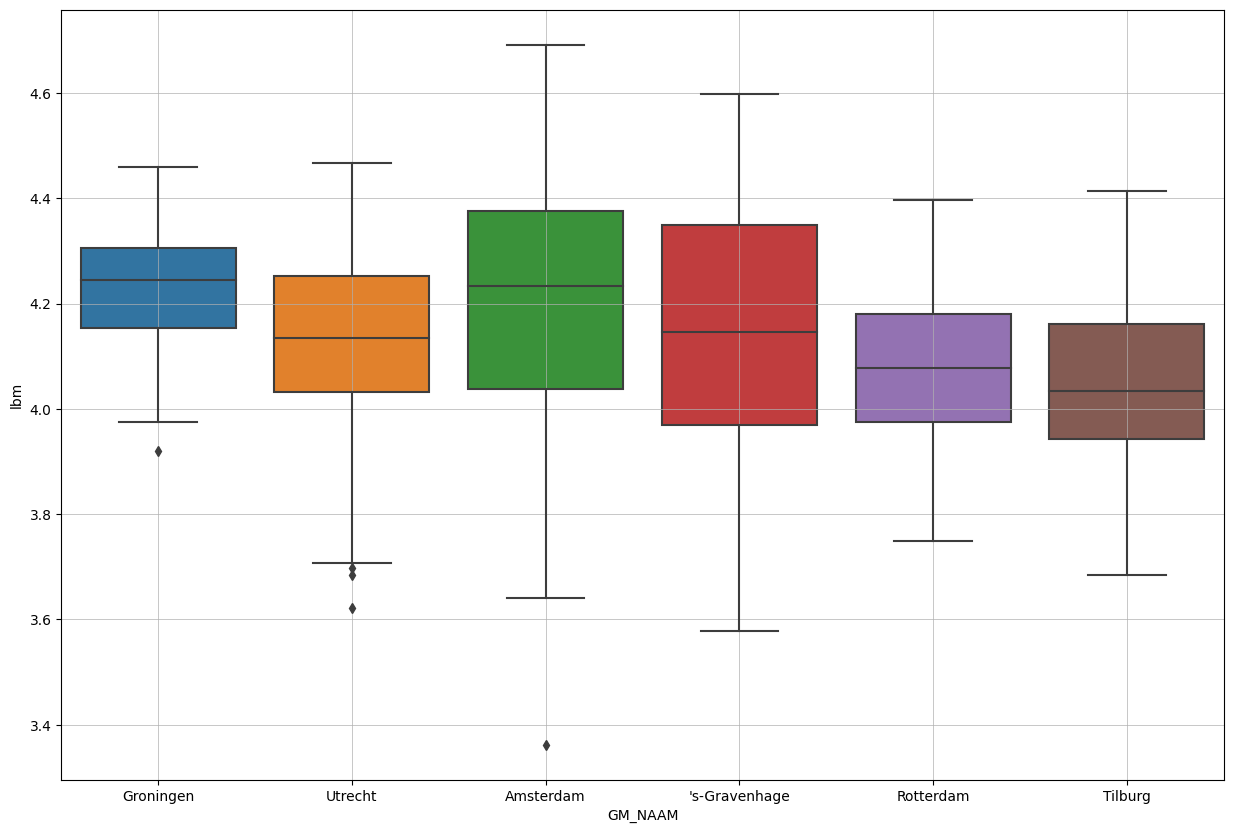

In [26]:
# Box plot
fig, axes = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
GM_select = ['Amsterdam','Rotterdam','Utrecht',"'s-Gravenhage",'Groningen','Tilburg']
df_GM_select = buurt_df[buurt_df['GM_NAAM'].isin(GM_select)]
sns.boxplot(ax = axes, y = df_GM_select.lbm, x = df_GM_select.GM_NAAM, orient="v" )

axes.grid(True,linewidth = 0.5)
plt.show()

**Interpretation of results**
* Looking at the **median** scores, Amsterdam and Groninger are the best municipalities to live in. <br>
* Unlike Groningen, Amsterdam also has very unliveable buurten. This can be seen from the outliers at the lower side.
* Larger cities seem to have a higher variance in the liveability scores across buurten (which is to be expected).

<br>

### <span style="color:skyblue">Exercise 5:  Scatter the median liveability scores of gemeentes based on wijk and buurt level data</span>
`A` Create a scatter plot in which the median liveability score of the gemeente as computed using wijk level data is at the x-axis and the median liveability score as computed using buurt level data is at the y-axis. (hint: use the pandas method groupby)<br>
`B` Interpret the results


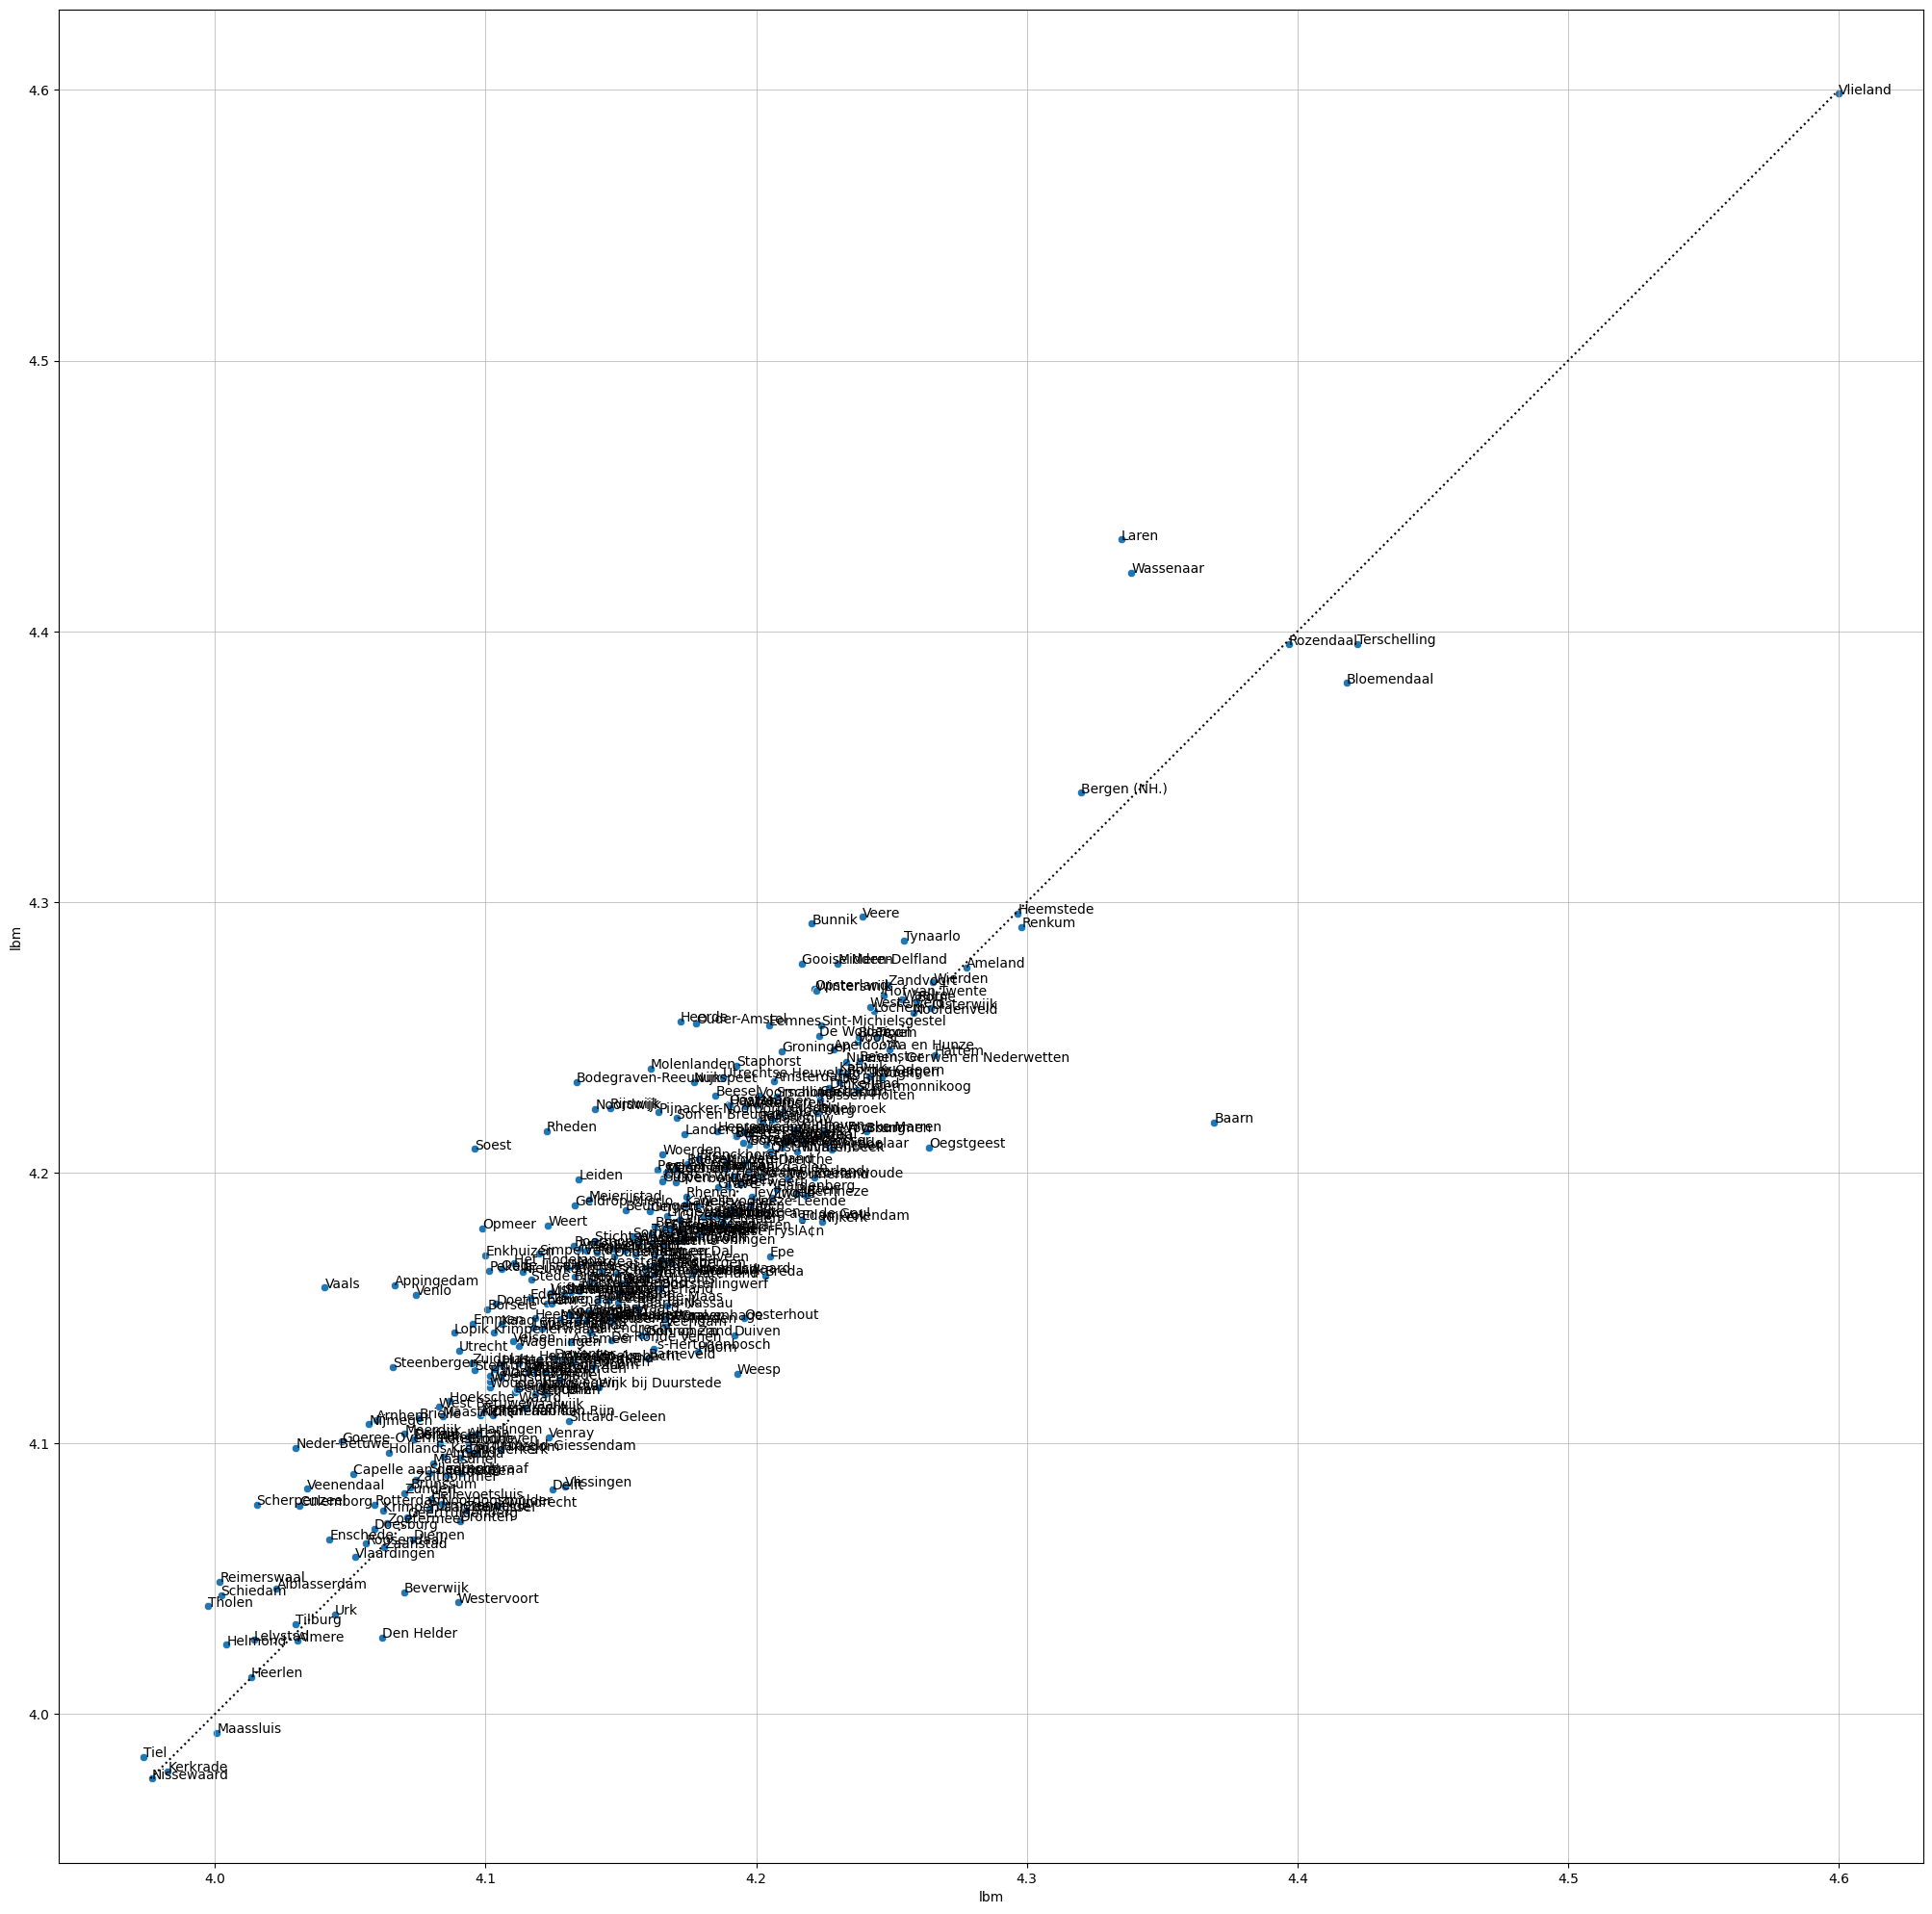

In [27]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
# Get median values per gemeente
median_lbm_on_wk = wijk_df.groupby('GM_CODE')['lbm'].median()
median_lbm_on_bu = buurt_df.groupby('GM_CODE')['lbm'].median()

fig, axes = plt.subplots(1, 1, figsize=(25, 25))
sns.scatterplot(x = median_lbm_on_wk, y = median_lbm_on_bu)
axes.set_aspect('equal', adjustable='box')
axes.grid(True,linewidth = 0.5)

# Add diagonal line
x_diag = [min(median_lbm_on_bu),max(median_lbm_on_bu)]
y_diag = [min(median_lbm_on_bu),max(median_lbm_on_bu)]
sns.lineplot(x = x_diag, y = x_diag,linestyle = ':',color = 'k')

# Loop through the data points
for i, gem_name in enumerate (gemeente_df.GM_CODE):
    plt.text(median_lbm_on_wk[i],median_lbm_on_bu[i],gemeente_df.GM_NAAM[i])

In [29]:
buurt_df.head()

,BU_CODE,gm_naam,geometry,BU_NAAM,WK_CODE,GM_CODE,GM_NAAM,IND_WBI,H2O,POSTCODE,...,fys,onv,soc,vrz,won,Gemeentecode,Gemeentenaam,Provinciecode,ProvinciecodePV,Provincienaam
0,BU00030000,Appingedam,"POLYGON ((253552.594 594537.625, 253607.703 59...",Appingedam-Centrum,WK000300,GM0003,Appingedam,1,NEE,9901.0,...,0.018589,0.018267,0.016757,-0.066506,0.029385,3,Appingedam,20,PV20,Groningen
1,BU00030001,Appingedam,"POLYGON ((251866.000 594423.375, 252643.203 59...",Appingedam-West,WK000300,GM0003,Appingedam,1,NEE,9903.0,...,0.008886,0.040026,0.036772,-0.117861,0.034001,3,Appingedam,20,PV20,Groningen
2,BU00030002,Appingedam,"POLYGON ((254580.774 594572.707, 254578.734 59...",Appingedam-Oost,WK000300,GM0003,Appingedam,1,NEE,9902.0,...,0.023694,-0.006718,-0.000822,-0.105294,-0.001442,3,Appingedam,20,PV20,Groningen
3,BU00030007,Appingedam,"POLYGON ((251082.797 593522.500, 251235.797 59...",Verspreide huizen Damsterdiep en Eemskanaal,WK000300,GM0003,Appingedam,1,NEE,9903.0,...,-0.004327,0.097363,0.112268,-0.156507,0.077258,3,Appingedam,20,PV20,Groningen
4,BU00030008,Appingedam,"POLYGON ((254809.461 592701.710, 254809.858 59...",Verspreide huizen ten zuiden van Eemskanaal,WK000300,GM0003,Appingedam,1,NEE,9902.0,...,-0.076229,0.098263,0.126321,-0.200758,0.148077,3,Appingedam,20,PV20,Groningen


## 4. Conducting multiple linear regression analyses
Regression models are often used to obtain first insights on the relationship between a (scalar) target and one or more features. Regression models come in many different forms: e.g. simple, multiple, ordinal, Poisson, etc. Usually, a multiple linear regression model serves as a good benchmark.

In ML the focus is usually on generalisation. That is, the model performance is evaluated by looking at the performance on an unseen set of the data (generalisation performance).<br>

For these analyses, we use the **sk-learn** Python library. This Python library is especially designed machine learning.
Having seen the scatter plots and bar plots, we focus on the following 7 features: *ANNT_INW*, *BEV_DICHTH*, *P_KOOPWON*, *fys*, *soc*, *won*, and *onv*

In [29]:
# Set the seed number for reproducibility. It governs which data points go to the test set and which go to the training set
rs = 12345

# Create X
X_lin = pd.DataFrame([buurt_df["AANT_INW"].div(100000),buurt_df["BEV_DICHTH"].div(10000), buurt_df["P_KOOPWON"].div(100),buurt_df["fys"],buurt_df["soc"],buurt_df["won"],buurt_df["onv"]]).transpose()
print(X_lin.shape)

# Create Y
Y = buurt_df.lbm

# Create linear regression object
regr = LinearRegression(fit_intercept = True)

# Split the data in a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_lin, Y, test_size=0.25,random_state = rs)

# Fit the model on the training data
regr.fit(X_train,Y_train)

# Evaluate the model generalisation performance on the Train and Test data sets
Y_pred_train = regr.predict(X_train)
mse_train = mean_squared_error(Y_train,Y_pred_train)
R2_train = r2_score(Y_train,Y_pred_train)

Y_pred_test = regr.predict(X_test)
mse_test  = mean_squared_error(Y_test, Y_pred_test)
R2_test = r2_score(Y_test,Y_pred_test)

# Print results
print('Results linear multiple regression model')
print(f'Mean Squared Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
print(f'R2                 Train | Test: \t{R2_train:>7.4f}\t|  {R2_test:>7.4f}\n')
print('Weights')
print(f'Intercept: \t\t\t {regr.intercept_:>7.4f}')
for n in range(len(regr.coef_)):
    print(f'Weight_{X_lin.keys()[n]:10s} \t\t {regr.coef_[n]:>7.4f}')

(11403, 7)
Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0066	|   0.0071
R2                 Train | Test: 	 0.5991	|   0.5820

Weights
Intercept: 			  4.0516
Weight_AANT_INW   		 -0.0626
Weight_BEV_DICHTH 		  0.1351
Weight_P_KOOPWON  		 -0.0259
Weight_fys        		  0.7715
Weight_soc        		  0.3782
Weight_won        		  1.1780
Weight_onv        		  0.6743


**Interpretation of results**
* Looking at the MSE and R2, we see that the performance on the **test** data set is roughly equal to the performance on the **train** data set. This tells us that the model is not overfitting.
* An advantage of regression models is that their weights are interpretable. For instance, the positive and comparatively large weight associated with *BEV_DICHTH* tells us that high population density is associated with high liveability.
<br>

### <span style="color:skyblue">Exercise 6:  Impact of seed number on the regression results</span>
`A` Re-do the regression using different seed numbers (e.g. 1,2,3,4. etc) and reflect on the stability of the results<br>

In [ ]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A

### <span style="color:skyblue">Exercise 7:  Generalisation</span>
`A` Train a new extended multiple regression model. To do so, add 13 extra features to the model that could be associated with liveability. For this extended model, compute the Mean Squared Error and R2 both for the train and test data sets.<br>
`B` The picture below shows the Bias-Variance trade-off. Looking at the MSE and R2 of the model with 7 features and the extended model (with 20 features), where do you think these two models can be placed in the picture (Region A, B, C, D, or E)?  Explain your answer.
<br><br><br>
![Bias_variance_tradeoff](data/Bias_variance.png)

In [30]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
# Your code here
# Use as many cells as you need

# A

# Create data frames
frames1 = pd.DataFrame([buurt_df["AANT_INW"].div(100000),buurt_df["BEV_DICHTH"].div(10000), buurt_df["P_KOOPWON"].div(100),buurt_df["fys"],buurt_df["soc"],buurt_df["won"],buurt_df["onv"]]).transpose()
frames2 = buurt_df[['P_15_24_JR','P_STERFT','P_GESCHEID','STED','WOZ','P_MAROKKO','P_ANT_ARU','P_SURINAM','P_TURKIJE','P_1GEZW','P_MGEZW','OAD','AANT_VROUW']]

X_lin_extended = pd.concat([frames1,frames2],axis=1)
X_lin_extended.replace(-99999999,np.nan, inplace = True)
X_lin_extended.fillna(X_lin_extended.mean(),inplace = True)

# Create Y
Y = buurt_df.lbm

# Create linear regression object
regr = LinearRegression(fit_intercept = True)

# Split the data in a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_lin_extended, Y, test_size=0.25,random_state = rs)

# Fit the model on the training data
regr.fit(X_train,Y_train)

# Evaluate the model generalisation performance on the Train and Test data sets
Y_pred_train = regr.predict(X_train)
mse_train = mean_squared_error(Y_train,Y_pred_train)
R2_train = r2_score(Y_train,Y_pred_train)

Y_pred_test = regr.predict(X_test)
mse_test  = mean_squared_error(Y_test, Y_pred_test)
R2_test = r2_score(Y_test,Y_pred_test)

# Print results
print('Results linear multiple regression model')
print(f'Mean Squared Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
print(f'R2                 Train | Test: \t{R2_train:>7.4f}\t|  {R2_test:>7.4f}\n')
print('Weights')
print(f'Intercept: \t\t\t {regr.intercept_:>7.4f}')
for n in range(len(regr.coef_)):
    print(f'Weight_{X_lin_extended.keys()[n]:10s} \t\t {regr.coef_[n]:>7.4f}')

# B
# The extended model is probably in region B. We conclude this because we still see little overfitting going on. This suggests the model could further increase in complexity.
# As a result, we can conclude the first model is probably in Region A. It fits worse that the extended model. This says that it is more biased.

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0029	|   0.0028
R2                 Train | Test: 	 0.8251	|   0.8356

Weights
Intercept: 			 10.1865
Weight_AANT_INW   		 -0.9073
Weight_BEV_DICHTH 		 -0.0198
Weight_P_KOOPWON  		  0.0209
Weight_fys        		  0.8517
Weight_soc        		  0.7596
Weight_won        		  1.0501
Weight_onv        		  0.9182
Weight_P_15_24_JR 		 -0.0001
Weight_P_STERFT   		 -0.0000
Weight_P_GESCHEID 		 -0.0023
Weight_STED       		 -0.0167
Weight_WOZ        		 -0.0000
Weight_P_MAROKKO  		 -0.0003
Weight_P_ANT_ARU  		 -0.0061
Weight_P_SURINAM  		  0.0003
Weight_P_TURKIJE  		 -0.0015
Weight_P_1GEZW    		 -0.0614
Weight_P_MGEZW    		 -0.0607
Weight_OAD        		  0.0001
Weight_AANT_VROUW 		  0.0000
